In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df['flower'] = iris.target
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns', inplace = True)

In [28]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1,
       1, 3, 1, 3, 4, 3, 1, 1, 1, 1, 1, 4, 1, 3, 3, 3, 3, 4, 1, 1, 1, 1,
       3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 2, 4, 2, 4, 2, 2, 1, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4], dtype=int32)

In [29]:
df['cluster']=y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [30]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [4.5137931 , 1.4137931 ],
       [6.02608696, 2.14782609],
       [3.77368421, 1.15263158],
       [5.15172414, 1.90689655]])

No handles with labels found to put in legend.


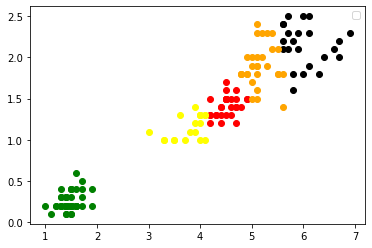

In [32]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'],color='yellow')
plt.scatter(df5['petal length (cm)'],df5['petal width (cm)'],color='orange')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],km.cluster_centers_[:,3],color='purple',marker='*',label='centroid')
plt.legend()

In [33]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_) # iise hume sum of squared error kaa pata chalta hain
sse   

[550.8953333333334,
 86.39021984551397,
 31.37135897435897,
 19.465989010989013,
 13.983213141025638,
 11.084575219743066,
 9.279544701675137,
 7.921598865187099,
 6.576538396386222]

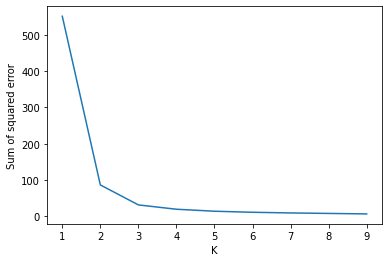

In [34]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)